# TCGA Gene Expression Classification Assignment

This notebook completes the assignment tasks:
1. Load expression data and labels
2. Split data (75% train, 25% test)
3. Train LogisticRegression classifier (5-class classification)
4. Evaluate accuracy
5. (Bonus) PCA visualization

**Note**: Using original 5 cancer types: BRCA, COAD, KIRC, LUAD, PRAD


## Task 1: Load the expression data and labels


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load gene expression data
data = pd.read_csv('data.csv', index_col=0)
print(f"Expression data shape: {data.shape}")
print(f"  - Samples: {data.shape[0]}")
print(f"  - Genes: {data.shape[1]}")

# Load labels
labels = pd.read_csv('labels.csv', index_col=0)
print(f"\nLabels shape: {labels.shape}")
print(f"  - Unique classes: {labels['Class'].unique()}")
print(f"\nClass distribution:")
print(labels['Class'].value_counts())


Expression data shape: (801, 20531)
  - Samples: 801
  - Genes: 20531

Labels shape: (801, 1)
  - Unique classes: ['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']

Class distribution:
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [18]:
# Use original cancer types (5 classes)
y = labels['Class'].copy()

print(f"Using original cancer types:")
print(f"  Classes: {sorted(y.unique())}")
print(f"\nClass distribution:")
print(y.value_counts())

# Extract features
X = data.values
print(f"\n✓ Data prepared: X shape {X.shape}, y shape {y.shape}")
print(f"  - This is a {len(y.unique())}-class classification problem")


Using original cancer types:
  Classes: ['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD']

Class distribution:
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

✓ Data prepared: X shape (801, 20531), y shape (801,)
  - This is a 5-class classification problem


## Task 2: Split data into training (75%) and testing (25%) sets


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,  # 25% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class proportions
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())


Training set: 600 samples
Testing set: 201 samples

Training set class distribution:
Class
BRCA    225
KIRC    109
LUAD    106
PRAD    102
COAD     58
Name: count, dtype: int64

Testing set class distribution:
Class
BRCA    75
KIRC    37
LUAD    35
PRAD    34
COAD    20
Name: count, dtype: int64


## Task 3: Train a LogisticRegression classifier


In [20]:
# Standardize features (important for LogisticRegression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
clf = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Increase iterations for convergence
    solver='lbfgs'  # Good for multi-class problems
)
clf.fit(X_train_scaled, y_train)

print("✓ Model trained successfully")


✓ Model trained successfully


## Task 4: Evaluate accuracy on testing data


In [21]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("=" * 60)
print(f"ACCURACY: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("=" * 60)


ACCURACY: 0.9900 (99.00%)


## Task 5 (Bonus): PCA Visualization

Use PCA to reduce dimensionality to 2 components and create a scatter plot colored by cancer type.


In [ ]:
# Apply PCA to the full dataset (before train/test split for visualization)
X_full_scaled = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full_scaled)

print(f"PCA explained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")
print(f"\n⚠️ Note: Only {pca.explained_variance_ratio_.sum()*100:.1f}% variance explained by 2 components")
print(f"   This means we're losing {(1-pca.explained_variance_ratio_.sum())*100:.1f}% of information in 2D visualization")

print("\n" + "=" * 60)
print("PCA主成分解释")
print("=" * 60)
print("\n【横轴 - PC1 (第一主成分)】")
print(f"  - 解释方差: {pca.explained_variance_ratio_[0]*100:.2f}%")
print("  - 含义: 这是数据中变化最大的方向")
print("  - 构成: 是所有20,531个基因表达值的加权线性组合")
print("  - 值越大: 表示该样本在这个主要变化方向上越靠右")

print("\n【纵轴 - PC2 (第二主成分)】")
print(f"  - 解释方差: {pca.explained_variance_ratio_[1]*100:.2f}%")
print("  - 含义: 这是数据中第二大的变化方向（与PC1垂直）")
print("  - 构成: 也是所有基因表达值的加权线性组合，但与PC1正交")
print("  - 值越大: 表示该样本在这个次要变化方向上越靠上")

print("\n💡 关键理解:")
print("  - 每个主成分 = 所有基因的加权组合")
print("  - PC1和PC2是相互垂直的（正交）")
print("  - 这些组合是自动找到的，能最大化保留数据的变化")
print("  - 每个样本的坐标(x, y) = (PC1值, PC2值)")


PCA explained variance ratio:
  PC1: 0.1054 (10.54%)
  PC2: 0.0875 (8.75%)
  Total: 0.1929 (19.29%)

⚠️ Note: Only 19.3% variance explained by 2 components
   This means we're losing 80.7% of information in 2D visualization


✓ Visualization saved as 'pca_visualization.png'


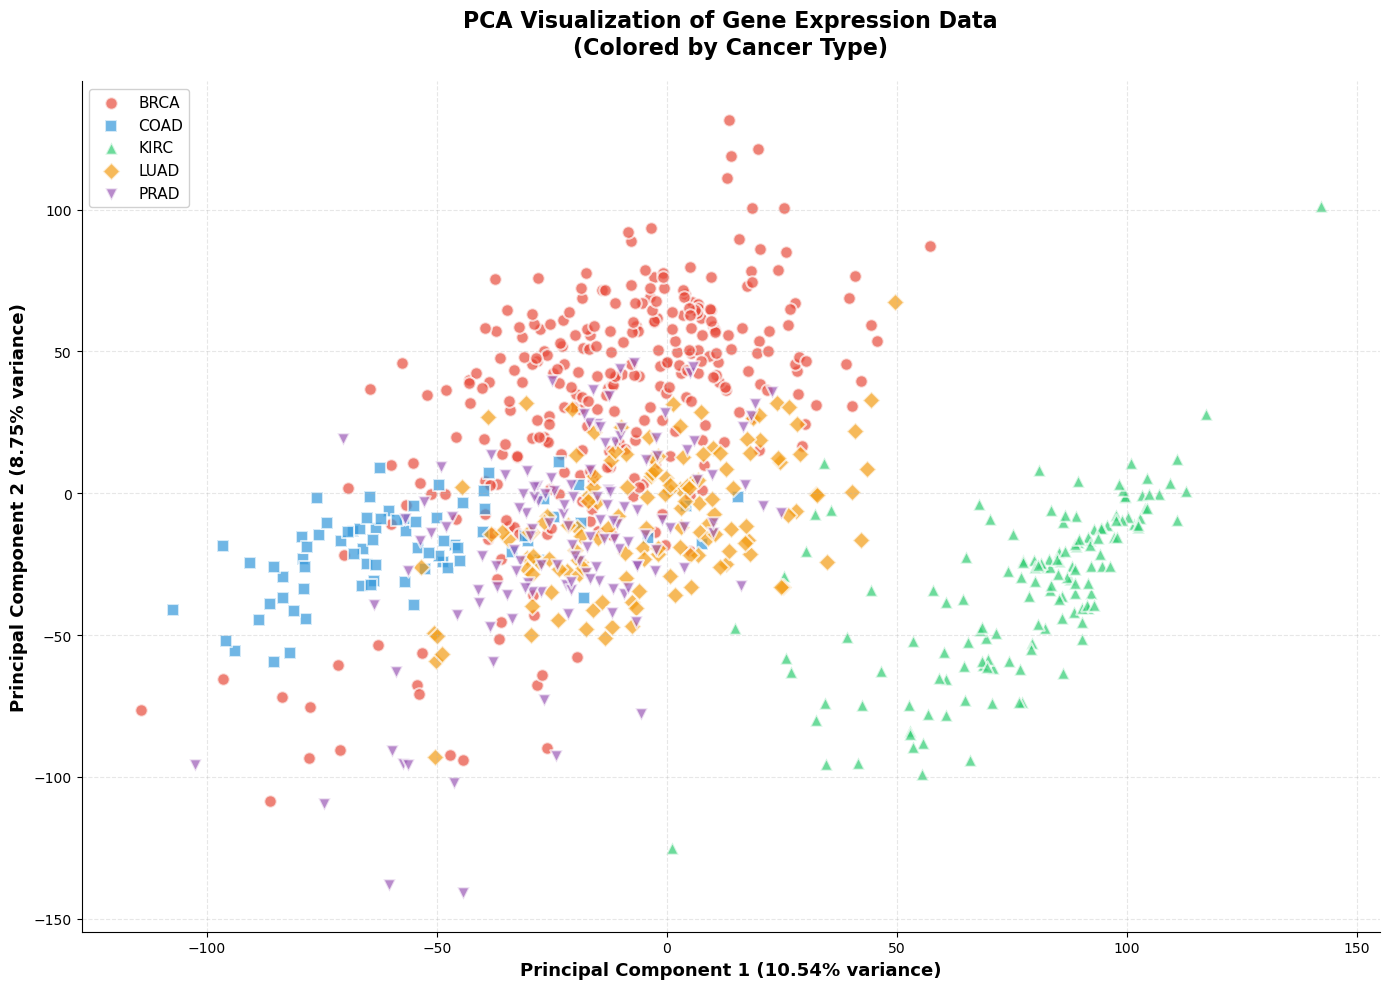

In [23]:
# Create improved scatter plot with better visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Get unique cancer types for coloring
unique_classes = sorted(y.unique())

# Use more distinct and visually appealing colors
# Color palette optimized for 5 classes
colors = {
    'BRCA': '#E74C3C',    # Red
    'COAD': '#3498DB',    # Blue
    'KIRC': '#2ECC71',    # Green
    'LUAD': '#F39C12',    # Orange
    'PRAD': '#9B59B6'     # Purple
}

# Different markers for better distinction
markers = ['o', 's', '^', 'D', 'v']

# Plot each class with distinct style
for i, cancer_type in enumerate(unique_classes):
    mask = y == cancer_type
    ax.scatter(
        X_pca[mask, 0], 
        X_pca[mask, 1],
        label=cancer_type,
        alpha=0.7,
        s=80,
        c=colors[cancer_type],
        marker=markers[i],
        edgecolors='white',
        linewidths=1.5
    )

# Add centroids for each class (optional - can comment out if too cluttered)
show_centroids = False  # Set to True to show centroids
if show_centroids:
    for cancer_type in unique_classes:
        mask = y == cancer_type
        centroid = X_pca[mask].mean(axis=0)
        ax.scatter(
            centroid[0], 
            centroid[1],
            marker='*',
            s=500,
            c='black',
            edgecolors='white',
            linewidths=2,
            zorder=10
        )

ax.set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', 
              fontsize=13, fontweight='bold')
ax.set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', 
              fontsize=13, fontweight='bold')
ax.set_title('PCA Visualization of Gene Expression Data\n(Colored by Cancer Type)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Save the plot
plt.savefig('pca_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved as 'pca_visualization.png'")

plt.show()


## Analysis: Are the cancer types linearly separable?

Based on the PCA visualization and classifier accuracy, we can assess whether the different cancer types are linearly separable.

**Note**: PCA only shows 2D projection. The actual separability in high-dimensional space (20,531 genes) may be better than what we see in 2D.


In [24]:
# Analyze separation between classes
unique_classes = sorted(y.unique())
n_classes = len(unique_classes)

# Calculate centroids for each class
centroids = {}
for cancer_type in unique_classes:
    mask = y == cancer_type
    centroids[cancer_type] = X_pca[mask].mean(axis=0)

# Calculate pairwise distances between centroids
print("Pairwise distances between class centroids:")
print("-" * 60)
for i, class1 in enumerate(unique_classes):
    for class2 in unique_classes[i+1:]:
        distance = np.linalg.norm(centroids[class1] - centroids[class2])
        print(f"  {class1} <-> {class2}: {distance:.2f}")

print(f"\nClassifier accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "=" * 60)
print("CONCLUSION:")
print("=" * 60)

if accuracy > 0.95:
    print("✓ Very high accuracy indicates excellent linear separability")
    print("✓ The PCA visualization should show clear separation between cancer types")
    print("✓ Yes, the different cancer types appear to be linearly separable")
    print("✓ LogisticRegression can effectively distinguish between the 5 cancer types")
elif accuracy > 0.85:
    print("✓ High accuracy indicates good linear separability")
    print("✓ The PCA visualization should show mostly clear separation")
    print("✓ The cancer types are largely linearly separable")
elif accuracy > 0.75:
    print("⚠ Moderate accuracy suggests partial linear separability")
    print("⚠ The PCA visualization may show some overlap between classes")
    print("⚠ Some cancer types may be more difficult to separate linearly")
else:
    print("✗ Lower accuracy suggests limited linear separability")
    print("✗ The PCA visualization likely shows significant overlap")
    print("✗ The cancer types may not be easily linearly separable")
    print("✗ Consider using non-linear classifiers")


Pairwise distances between class centroids:
------------------------------------------------------------
  BRCA <-> COAD: 68.58
  BRCA <-> KIRC: 111.51
  BRCA <-> LUAD: 42.18
  BRCA <-> PRAD: 48.95
  COAD <-> KIRC: 135.82
  COAD <-> LUAD: 54.67
  COAD <-> PRAD: 36.24
  KIRC <-> LUAD: 85.02
  KIRC <-> PRAD: 100.59
  LUAD <-> PRAD: 18.88

Classifier accuracy: 0.9900 (99.00%)

CONCLUSION:
✓ Very high accuracy indicates excellent linear separability
✓ The PCA visualization should show clear separation between cancer types
✓ Yes, the different cancer types appear to be linearly separable
✓ LogisticRegression can effectively distinguish between the 5 cancer types
